# Thanks [단국대 대회] Bike Demand 


안녕하세요. 저희는 인공지능을 공부하는 소프트웨어학과 학부생 2명으로 이뤄진 hi팀입니다. <br>
먼저 대회를 개최해주신 단국대, 데이콘에게 감사드립니다. <br>
대회를 준비하면서 많은 것을 배웠고 처음으로 등수 안에 드는 성과도 내보았습니다. 감사합니다.

## Setting

- 운영체제 : 64비트 운영 체제, x64 기반 프로세서
- 프로세서 : AMD Ryzen 7 5800X 8-Core Processor   3.80 GHz
- python : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]

## library Version

- numpy : 1.23.0rc3'
- pandas : 1.3.5
- pycaret : '2.3.10'

# Content

#### 데이터셋 및 모듈 불러오기
- train, test data 모두 결측치가 존재하므로, 결측치 데이터 처리 및 데이터 전처리를 편리하게 하기 위해, <br>
  pd.concat을 활용하여 동시에 처리했습니다.
  
  
#### 데이터 전처리(1부 - 결측치 제거 및 type 변환)
- date 데이터의 경우, type의 형태가 datetime이므로, 이를 년,월,일로 변환하였습니다. <br>
  특히 2018년에서 2020년까지 매해 자전거의 수요가 급증하고 있어 '연도'를 중요한 기준으로 생각했습니다.


- 강수량(precipitation)과 일조합(sunshine_sum)의 결측값들은 0으로 채웠습니다. <br>
  강수량(precipitation) 데이터의 경우 비가 안오는 날이 대부분이므로, 0으로 채웠으며, <br>
  일조합(sunshine_sum)의 경우 일조율(sunshine_rate)이 0인 경우에 결측치 이므로, <br>
  sum이 0이므로, rate도 0이기에, 0으로 채웠습니다.
  
  
- 미세먼지(PM10)와 초미세먼지(PM2.5)의 경우, 이전의 데이터 값으로 채웠습니다. <br>
  미세먼지 및 초미세먼지는 이전 날짜의 영향을 많이 받는다고 생각하기 때문입니다. <br>
  
  

#### 데이터 전처리(2부 - feature 추가)
- 자전거를 이용하는 수요가 계절별로 다르므로, 달(month) feature를 활용하여,   <br>
  계절(season)이라는 데이터를 추가하였습니다.
  
  
- 또한, 자전거를 이용하는 사람들이 평일보다는 주중이 많기에, is_week feature를 사용하여,
  데이터를 추가하였습니다. <br>
  특히 공휴일의 자전거 사용량이 평소에 비해 많다고 판단해서 주중으로 동일하게 처리하였습니다. <br>


- 이전에 주최된 Kaggle, DACON 사이트 내에서 열린 대회를 본다면, <br>
  불쾌지수, 추운 정도, 일교차, 체감 온도, 열지수등을 사용하는 경우 및 Kaggle 이나 DACON에 설명은 없지만,
  관련된 아이디어를 사용하였습니다. <br>
  (보시다시피 주석처리한것은 실제로 사용하지 않는 것을 의미합니다.) <br>
  (pandas profiling 과 pycaret의 plot_model을 통해서 봤을 때,  <br> 
   상관관계 및 score가 낮아지므로 추가하지 않았습니다.)
  
  
- 추가로, 미세먼지의 경우 편차가 존재하여, normalize를 통하여 정규화하였습니다. <br>
  (아마, 정규화를 하든,안하든 성능차이가 많이 나지는 않지만, 그래도 하는 것이 성능향상에 도움되었습니다.)


#### 데이터 전처리(3부 - Mljar.GoldenSearch)
- 해당 모듈은 성능이 잘 향상되지 않아, 어떻게 하면 향상시킬 수 있을까 하면서, 하다가 발견한 module입니다. <br>
  (정규화 전후에 성능차이가 뚜렷하게 나타나지는 않았지만 조금은 성능 향상에 도움이 되었습니다.)


- 사용방법관련해서는 링크 첨부해두도록 하겠습니다.


#### 모델 생성 및 데이터 제거 (1부)
- 데이터 전처리 중에 생성된 데이터와 모델학습에 영향을 주지 않는 요소들은 제거하였습니다. <br>
  (모델 생성과 데이터부분에서 상당한 제출이 있었습니다.) <br>
  date 데이터를 제거하지 않는 이유는 학습 시 pycaret 내에서 알아서 인코딩되어 feature를 생성하는데, 제거했을 때보다, 추가했을 때가 <br>
  상당히 성능이 좋았습니다.


- 또한 자전거 수요량의 log를 씌움으로써, 오차가 적게 발생하게 하였습니다. 이는 회귀에서 종종 사용되는 방법입니다.


#### 모델 생성  및 제출(2부)
- pycaret을 활용하였습니다. (Pycaret을 활용한후, Sklearn에 그대로 적용해보니까, 동일 성능이 나오지는 않더라고요..) <br>
  pycaret과 관련된 parameter들은 pycaret docs를 참고하시기 바랍니다. <br>


- 대부분 이전 대회에서 tree기반 모델을 많이 사용하여, catboost, lgbm, xgboost, ngregressor, gbr을 사용하여, <br>
  blend , stacking 을 하면서 다양한 방법을 진행하며, metrics 으로 추가한 NMAE 지표를 보면서 제출을 하였습니다.
  (여기서 20~30정도 제출이 있던것 같습니다.. 더이상 성능이 안올라서 좌절도 했습니다..)


- 마지막으로, 연도에 따라 자전거 대여량이 증가한다는 점을 고려해 상승률분을 곱해야 한다고 생각했습니다. 1.1, 1.2, 1.3, 1.4를 곱하였을 때, 1.3이 최고의 성능을 나타냈으며, <br>
  마지막에서는 1.35, 1.32를 곱하면서 이분 탐색 느낌으로 소수점을 바꾸어가며 가장 성능이 좋게 나오는 상승률분을 찾았습니다.<br> 

#### 참고 및 대회를 진행하며 학습한 관련 내용 링크

- https://blog.naver.com/qkrdnjsrl0628/222778371157

- https://blog.naver.com/qkrdnjsrl0628/222780388268

- https://github.com/logicalguess/kaggle-bike-sharing-demand

- https://dacon.io/competitions/official/235837/codeshare/3724?page=1&dtype=recent

- https://blog.naver.com/qkrdnjsrl0628/222797273335

- https://towardsdatascience.com/5-things-you-dont-know-about-pycaret-528db0436eec

## 데이터셋 및 모듈 불러오기
- train, test data 모두 결측치가 존재하므로, 결측치 데이터 처리 및 데이터 전처리를 편리하게 하기 위해, <br>
  pd.concat을 활용하여 동시에 처리했습니다.


- 추후 Pycaret에서 사용하기 위해 리더 보드 평가 산식을 정의하였습니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Concatenate dataframe
all_data = pd.concat([train, test], ignore_index = True)        

In [2]:
# NMAE(Normalized Mean Absolute Error)
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

## 데이터 전처리(1부 - 결측치 제거 및 type 변환)
- date 데이터의 경우, type의 형태가 datetime이므로, 이를 년,월,일로 변환하였습니다. <br>
  특히 2018년에서 2020년까지 매해 자전거의 수요가 급증하고 있어 '연도'를 중요한 기준으로 생각했습니다.


- 강수량(precipitation)과 일조합(sunshine_sum)의 결측값들은 0으로 채웠습니다. <br>
  강수량(precipitation) 데이터의 경우 비가 안오는 날이 대부분이므로, 0으로 채웠으며, <br>
  일조합(sunshine_sum)의 경우 일조율(sunshine_rate)이 0인 경우에 결측치 이므로, <br>
  sum이 0이므로, rate도 0이기에, 0으로 채웠습니다.
  
  
- 미세먼지(PM10)와 초미세먼지(PM2.5)의 경우, 이전의 데이터 값으로 채웠습니다. <br>
  미세먼지 및 초미세먼지는 이전 날짜의 영향을 많이 받는다고 생각하기 때문입니다. <br>

In [3]:
def split_all_dates(data):                                                                          
    data['year'] = data['date'].apply(lambda x : x.split('-')[0]).astype('int')
    data['month'] = data['date'].apply(lambda x : x.split('-')[1]).astype('int')
    data['days'] = data['date'].apply(lambda x : x.split('-')[2]).astype('int')
    data['date'] = pd.to_datetime(data['date'])
    return data

all_data = split_all_dates(all_data)

def missing_fill_data(data):                                   # 결측치 추가
    data['precipitation'].fillna(0, inplace = True)
    data['sunshine_sum'].fillna(0, inplace = True)
    return data

all_data = missing_fill_data(all_data)

def pm_fill_data(data):           # 미세먼지 결측치 채우기 혹은 제거하기 # 두가지 실험 진행
    fill_features = ['PM10', 'PM2.5']
    for feature in fill_features:
        data[feature].fillna(method = 'bfill', inplace = True)    
    return data

all_data = pm_fill_data(all_data)

## 데이터 전처리(2부 - feature 추가)
- 자전거를 이용하는 수요가 계절별로 다르므로, 달(month) feature를 활용하여,   <br>
  계절(season)이라는 데이터를 추가하였습니다.
  
  
- 또한, 자전거를 이용하는 사람들이 평일보다는 주중이 많기에, is_week feature를 사용하여,
  데이터를 추가하였습니다. <br>
  특히 공휴일의 자전거 사용량이 평소에 비해 많다고 판단해서 주중으로 동일하게 처리하였습니다. <br>


- 이전에 주최된 Kaggle, DACON 사이트 내에서 열린 대회를 본다면, <br>
  불쾌지수, 추운 정도, 일교차, 체감 온도, 열지수등을 사용하는 경우 및 Kaggle 이나 DACON에 설명은 없지만,
  관련된 아이디어를 사용하였습니다. <br>
  (보시다시피 주석처리한것은 실제로 사용하지 않는 것을 의미합니다.) <br>
  (pandas profiling 과 pycaret의 plot_model을 통해서 봤을 때,  <br> 
   상관관계 및 score가 낮아지므로 추가하지 않았습니다.)
  
  
- 추가로, 미세먼지의 경우 편차가 존재하여, normalize를 통하여 정규화하였습니다. <br>
  (아마, 정규화를 하든,안하든 성능차이가 많이 나지는 않지만, 그래도 하는 것이 성능향상에 도움되었습니다.)

In [4]:
def category_season(data):
    data['season'] = data['month'].copy()
    data.loc[(data['season'] == 12) | (data['season'] <= 2), 'season'] = 0
    data.loc[(data['season'] >= 3) & (data['season'] <= 5), 'season'] = 1
    data.loc[(data['season'] >= 6) & (data['season'] <= 8), 'season'] = 2
    data.loc[(data['season'] >= 9) & (data['season'] <= 11), 'season'] = 3
    return data

all_data = category_season(all_data)

def is_weekend(data):                  # 연휴 파악
    if data.weekday() >= 5:
        return 1
    else:
        return 0
    
all_data['is_week'] = all_data['date'].apply(lambda x : is_weekend(x))

def append_holiday(data):
    data.loc[(data['days'] == 1) & (data['month'] == 1), 'is_week'] = 1
    data.loc[(data['days'] == 1) & (data['month'] == 3), 'is_week'] = 1
    data.loc[(data['days'] == 5) & (data['month'] == 5), 'is_week'] = 1
    data.loc[(data['days'] == 6) & (data['month'] == 6), 'is_week'] = 1
    data.loc[(data['days'] == 3) & (data['month'] == 10), 'is_week'] = 1
    data.loc[(data['days'] == 9) & (data['month'] == 10), 'is_week'] = 1
    data.loc[(data['days'] == 25) & (data['month'] == 12), 'is_week'] = 1
    
    return data
all_data = append_holiday(all_data)

# 불쾌지수 산출식
def feature_discomfort(humid, temp_low, temp_high):
    temp = (temp_low + temp_high)/2
    humid = humid / 100
    discomfort = 1.8*temp - 0.558*(1-humid)*(1.8*temp - 26) + 32
    return discomfort

# 불쾌지수 데이터 가져오기    
def get_discomfort(data):
    all_data['discomfort'] = [0]*len(all_data)
    for i in range(len(all_data)):
        all_data.discomfort[i] = feature_discomfort(all_data.humidity[i],
                                               all_data.temp_lowest[i],
                                               all_data.temp_highest[i])
    return data

all_data = get_discomfort(all_data)

def append_cold_measure_temp_diff(data):
    # 추운 정도
    data['cold_measure'] = data['temp_lowest'] / data['wind_mean']
    # 일교차 반영
#     data['temp_diff'] = data['temp_highest'] - data['temp_lowest']
    return data

all_data = append_cold_measure_temp_diff(all_data)

def append_feel_temp_heat_index(data):
#     체감 온도
    data['feel_data'] = 13.12 + 0.6215*data['temp_mean'] - 11.37*(data['wind_mean']** 0.16) + 0.3965*data['temp_mean']*(data['wind_mean']** 0.16)

    # 열지수
    data['temp_mean_f'] = (data['temp_mean']* (9/5)) + 32   
    T = data['temp_mean_f']
    RH = data['humidity']
    data['heat_index'] = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
    data['heat_index'] = (data['heat_index']-32) * 5/9
    return data

all_data = append_feel_temp_heat_index(all_data)

# (Kaggle 수상 아이디어)
def append_kaggle_idea(data):
#     data['ideal'] = data[['temp_mean', 'wind_mean']].apply(lambda x: (0, 1)[x['temp_mean'] > 27 and x['wind_mean'] < 30], axis = 1)
#     data['sticky'] = data[['humidity', 'is_week']].apply(lambda x: (0, 1)[x['is_week'] == 1 and x['humidity'] >= 60], axis = 1)
    return data
# all_data = append_kaggle_idea(all_data)

# (DACON 수상 아이디어) 
def append_sweat_info(data):
#     all_data['sweat_info'] = all_data['temp_highest']*all_data['humidity']
    all_data['sweat_info2'] = all_data['temp_lowest']*all_data['humidity']
    return all_data
# all_data = append_sweat_info(all_data)

def is_rain(data):
    if data > 0:
        return 1
    else:
        return 0
all_data['is_rain'] = all_data['precipitation'].apply(lambda x : is_rain(x))


def normarlize_data(data):
    features = ['PM10']
    for feature in features:
        data[feature] = np.log1p(data[feature])
    
    return data

all_data = normarlize_data(all_data)

## 데이터 전처리(3부 - Mljar.GoldenSearch)
- 해당 모듈은 성능이 잘 향상되지 않아, 어떻게 하면 향상시킬 수 있을까 하면서, 하다가 발견한 module입니다. <br>
  (정규화 전후에 성능차이가 뚜렷하게 나타나지는 않았지만 조금은 성능 향상에 도움이 되었습니다.)


- 사용방법관련해서는 링크 첨부해두도록 하겠습니다.


- 해당 모듈을 사용했을 때, 아래 사진과 같은 결과가 나왔습니다. (그대로 추가했습니다.)<br>
<img src="https://i.ibb.co/HP5d8P0/feature-extractor.jpg" alt="feature-extractor" border="0">

In [5]:
def golden_feature(data):
    data['season_sum_year'] = data['season'] + data['year']
    data['heat_index_sum_precipitation'] = data['heat_index'] + data['precipitation']
    data['precipitation_diff_discomfort'] = data['precipitation'] - data['discomfort']
    data['season_multiply_year'] = data['season'] * data['year']
    data['precipitation_diff_temp_lowest'] = data['precipitation'] - data['temp_lowest']
    data['cold_measure_multiply_sunshine_rate'] = data['cold_measure'] * data['sunshine_rate']
    data['season_multiply_temp_highest'] = data['season'] * data['temp_highest']
    data['precipitation_diff_season'] = data['precipitation'] - data['season']
    data['season_multiply_sunshine_rate'] = data['season'] * data['sunshine_rate']
#     data['year_sum_temp_highest'] = data['year'] + data['temp_highest']
    return data

all_data = golden_feature(all_data)

## 모델 생성 및 데이터 제거 (1부)
- 데이터 전처리 중에 생성된 데이터와 모델학습에 영향을 주지 않는 요소들은 제거하였습니다. <br>
  (모델 생성과 데이터부분에서 상당한 제출이 있었습니다.) <br>
  date 데이터를 제거하지 않는 이유는 학습 시 pycaret 내에서 알아서 인코딩되어 feature를 생성하는데, 제거했을 때보다, 추가했을 때가 <br>
  상당히 성능이 좋았습니다.


- 또한 자전거 수요량의 log를 씌움으로써, 오차가 적게 발생하게 하였습니다. 이는 회귀에서 종종 사용되는 방법입니다.

In [6]:
def delete_features(data):         # feature 제거
    delete_feature = ['temp_mean_f', 'wind_max', 'PM2.5', 'sunshine_sum', 'wind_mean', 'feel_data']
    for feature in delete_feature:
        data.drop(feature, axis = 1, inplace = True)

    return data

all_data = delete_features(all_data)

def seprate_data(concat_Alldata):
    train = concat_Alldata[pd.notnull(concat_Alldata['rental'])]
    test = concat_Alldata[~pd.notnull(concat_Alldata['rental'])]
    return train, test

train, test = seprate_data(all_data)
train['rental'] = np.log1p(train['rental'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 1095 non-null   datetime64[ns]
 1   precipitation                        1095 non-null   float64       
 2   temp_mean                            1095 non-null   float64       
 3   temp_highest                         1095 non-null   float64       
 4   temp_lowest                          1095 non-null   float64       
 5   PM10                                 1095 non-null   float64       
 6   humidity                             1095 non-null   float64       
 7   sunshine_rate                        1095 non-null   float64       
 8   rental                               1095 non-null   float64       
 9   year                                 1095 non-null   int32         
 10  month       

## 모델 생성  및 제출(2부)
- pycaret을 활용하였습니다. (Pycaret을 활용한후, Sklearn에 그대로 적용해보니까, 동일 성능이 나오지는 않더라고요..) <br>
  pycaret과 관련된 parameter들은 pycaret docs를 참고하시기 바랍니다. <br>


- 대부분 이전 대회에서 tree기반 모델을 많이 사용하여, catboost, lgbm, xgboost, ngregressor, gbr을 사용하여, <br>
  blend , stacking 을 하면서 다양한 방법을 진행하며, metrics 으로 추가한 NMAE 지표를 보면서 제출을 하였습니다.
  (여기서 20~30정도 제출이 있던것 같습니다.. 더이상 성능이 안올라서 좌절도 했습니다..)


- 마지막으로, 연도에 따라 자전거 대여량이 증가한다는 점을 고려해 상승률분을 곱해야 한다고 생각했습니다. 1.1, 1.2, 1.3, 1.4를 곱하였을 때, 1.3이 최고의 성능을 나타냈으며, <br>
  마지막에서는 1.35, 1.32를 곱하면서 이분 탐색 느낌으로 소수점을 바꾸어가며 가장 성능이 좋게 나오는 상승률분을 찾았습니다.<br>

In [7]:
from pycaret.regression import *
model = setup(train, target = 'rental', 
              fold_shuffle=True,
              fold=15, 
              session_id=530,
              remove_multicollinearity = True,
              normalize= True,
              n_jobs = -1,
              silent = True,
              combine_rare_levels = True,
              ignore_low_variance = True ) 

,Description,Value
0,session_id,530
1,Target,rental
2,Original Data,"(1095, 27)"
3,Missing Values,False
4,Numeric Features,23
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(766, 39)"


In [8]:
add_metric('NMAE', 'NMAE', NMAE, greater_is_better = False)
top5_model = compare_models(round=4, n_select = 5, sort='NMAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE,TT (Sec)
catboost,CatBoost Regressor,0.1254,0.0482,0.2118,0.9297,0.0201,0.0127,0.0127,0.4600
lightgbm,Light Gradient Boosting Machine,0.1385,0.0543,0.2268,0.9220,0.0213,0.0139,0.0139,0.0627
xgboost,Extreme Gradient Boosting,0.1445,0.0597,0.2382,0.9128,0.0223,0.0144,0.0144,0.0447
gbr,Gradient Boosting Regressor,0.1451,0.0547,0.2290,0.9192,0.0216,0.0145,0.0145,0.0147
et,Extra Trees Regressor,0.1460,0.0677,0.2532,0.9016,0.0238,0.0147,0.0147,0.0307
rf,Random Forest Regressor,0.1567,0.0648,0.2485,0.9074,0.0233,0.0157,0.0157,0.0373
lr,Linear Regression,0.1956,0.0831,0.2844,0.8796,0.0264,0.0194,0.0194,0.1893
ridge,Ridge Regression,0.2063,0.0891,0.2945,0.8703,0.0274,0.0204,0.0204,0.0027
br,Bayesian Ridge,0.2065,0.0894,0.2951,0.8699,0.0275,0.0205,0.0205,0.0027
dt,Decision Tree Regressor,0.2194,0.1250,0.3501,0.8153,0.0327,0.0220,0.0220,0.0027


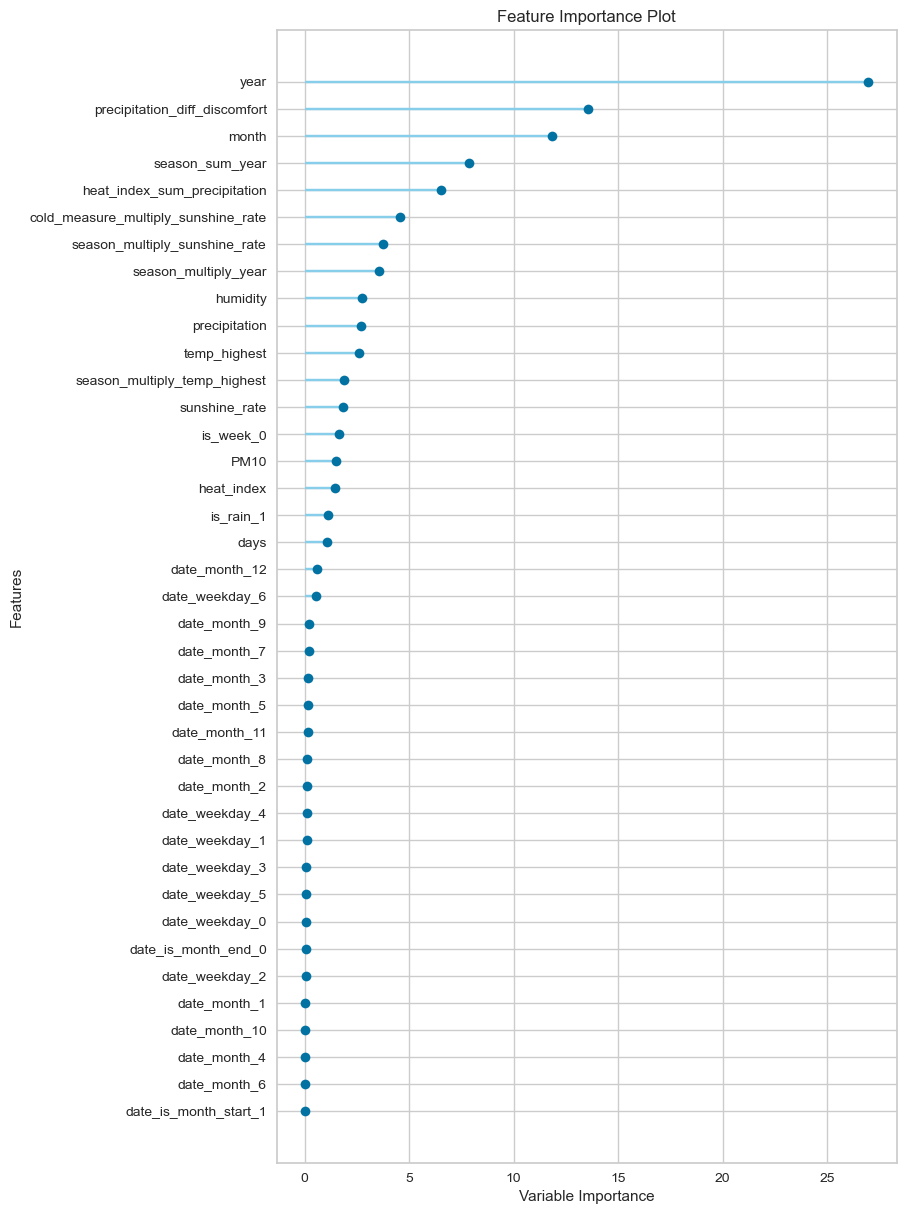

In [9]:
cat_model = create_model('catboost')
plot_model(cat_model, plot = 'feature_all')

In [10]:
temp = [top5_model[1], top5_model[3]]           # lgbm , gbr 사용, top5_model[0]
blender = blend_models(temp, optimize = 'NMAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE
Fold,,,,,,,
0,0.1054,0.0223,0.1493,0.9743,0.0135,0.0105,0.0105
1,0.1539,0.0568,0.2382,0.9277,0.0226,0.0156,0.0156
2,0.1615,0.0890,0.2983,0.8481,0.0286,0.0165,0.0165
3,0.1375,0.0490,0.2214,0.9410,0.0215,0.0140,0.0140
4,0.0940,0.0279,0.1671,0.9646,0.0156,0.0094,0.0094
5,0.1624,0.0627,0.2504,0.8774,0.0238,0.0161,0.0161
6,0.1102,0.0292,0.1710,0.9469,0.0146,0.0103,0.0103
7,0.1233,0.0528,0.2297,0.9309,0.0222,0.0128,0.0128
8,0.0959,0.0175,0.1324,0.9652,0.0120,0.0093,0.0093


In [11]:
prediction = predict_model(blender, data=test)
pred = np.expm1(prediction['Label'])*1.32

temp = pd.read_csv('./data/sample_submission.csv')
temp['rental'] = pred.reset_index()['Label']

submission = pd.DataFrame({
        "date" : temp['date'],
        "rental" : temp['rental']
})
submission.to_csv('submission51_dw.csv', index = False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE
0,Voting Regressor,0,0,0,0,0,0,nan


## 참고 및 대회를 진행하며 학습한 관련 내용 링크

- https://blog.naver.com/qkrdnjsrl0628/222778371157

- https://blog.naver.com/qkrdnjsrl0628/222780388268

- https://github.com/logicalguess/kaggle-bike-sharing-demand

- https://dacon.io/competitions/official/235837/codeshare/3724?page=1&dtype=recent

- https://blog.naver.com/qkrdnjsrl0628/222797273335

- https://towardsdatascience.com/5-things-you-dont-know-about-pycaret-528db0436eec